# Relatório de Análise VIII

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

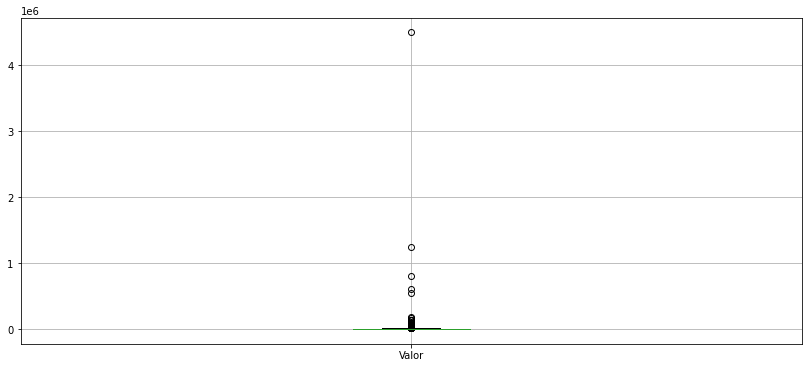

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7938,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11073,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
13170,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14405,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16145,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [6]:
valor = dados['Valor']

In [9]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [11]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [12]:
dados_new = dados[selecao]

<AxesSubplot:>

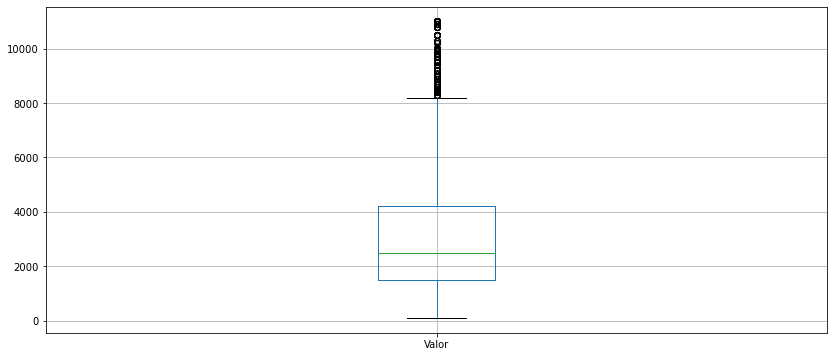

In [13]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

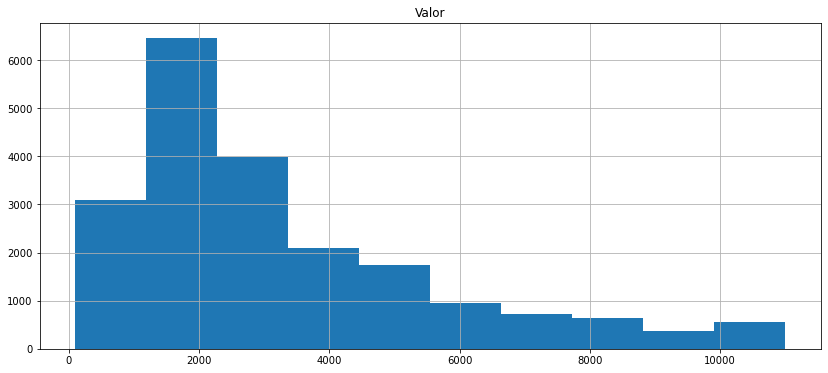

In [14]:
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (continuação

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

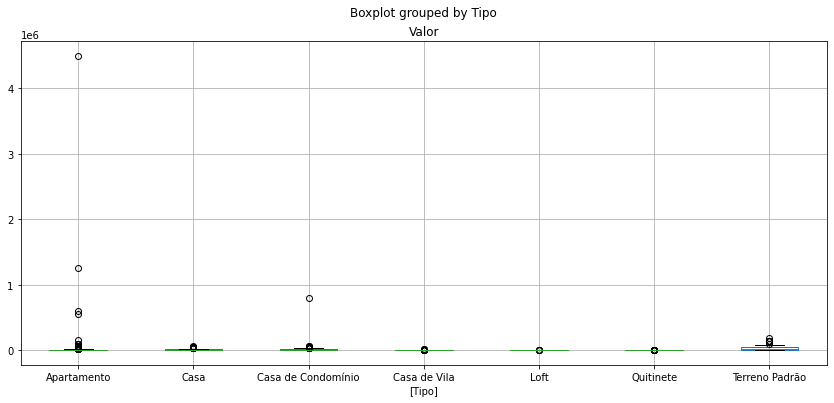

In [16]:
dados.boxplot(['Valor'], by = ['Tipo'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

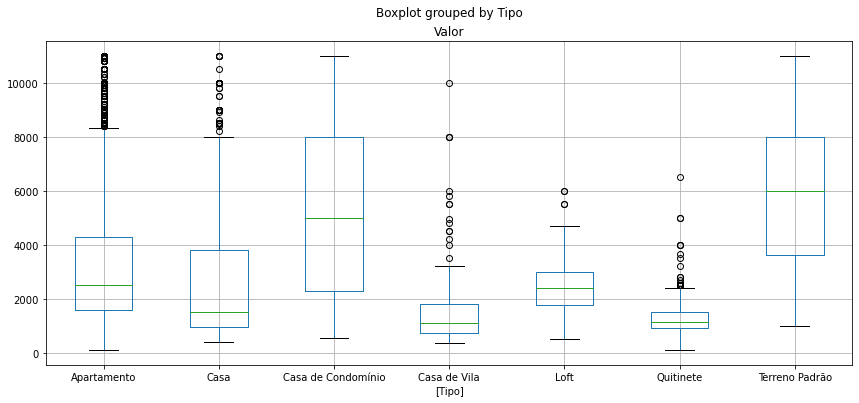

In [17]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [19]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [20]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 8, 9, 10, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, ...], 'Casa': [1, 24, 56, 59, 99, 103, 150, 166, 188, 249, 261, 264, 275, 298, 322, 328, 346, 351, 369, 391, 398, 412, 438, 448, 488, 489, 495, 528, 560, 561, 585, 590, 591, 639, 642, 651, 657, 658, 683, 700, 724, 745, 748, 784, 795, 805, 883, 901, 967, 1016, 1065, 1072, 1155, 1160, 1162, 1195, 1218, 1291, 1298, 1361, 1380, 1396, 1417, 1459, 1473, 1477, 1488, 1493, 1520, 1523, 1537, 1637, 1656, 1711, 1717, 1721, 1727, 1740, 1766, 1774, 1821, 1871, 1897, 1937, 1968, 1996, 2005, 2024, 2089, 2109, 2126, 2146, 2172, 2178, 2179, 2206, 2246, 2278, 2281, 2288, ...], 'Casa

In [21]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [22]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Loft                  1750.0
Quitinete              900.0
Terreno Padrão        8000.0
Name: Valor, dtype: float64

In [23]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Loft                   3000.0
Quitinete              1500.0
Terreno Padrão        40000.0
Name: Valor, dtype: float64

In [24]:
IIQ

Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Loft                   1250.0
Quitinete               600.0
Terreno Padrão        32000.0
Name: Valor, dtype: float64

In [25]:
IIQ['Casa']

8700.0

In [28]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

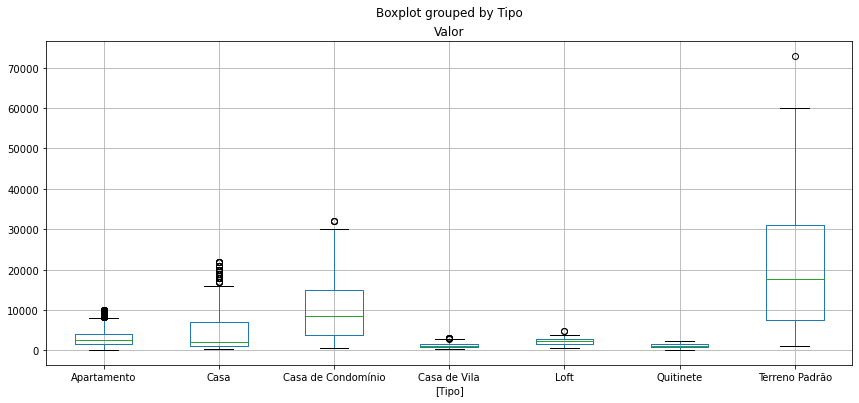

In [29]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [30]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)